<a href="https://colab.research.google.com/github/Vinayak-Sharma12/DEEPLEARNING-ASSIGNMENTS/blob/main/(7)P_TEST%2CT_SCORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **P Value TEST**

 The P-value test and Principal Component Analysis (PCA) are two different approaches for dimensionality reduction or feature selection.

The P-value in regression analysis measures the statistical significance of each feature in predicting the target variable. It helps determine whether the effect of a particular feature is statistically different from zero.



The P-value tests the null hypothesis that the coefficient of the feature is zero (no effect). If the p-value is small (typically less than 0.05), we reject the null hypothesis and conclude that the feature has a statistically significant effect on the target variable.


 If the P-value for a feature is large (greater than 0.05), it implies the feature may not be useful for predicting the target.

#**PCA**
is a mathematical procedure that transforms the features into a set of uncorrelated components (called principal components) that capture the maximum variance in the data. These components are linear combinations of the original features.

PCA reduces the number of dimensions (features) by transforming them into principal components, but it does not consider the relationship between the features and the target variable. Instead, it focuses purely on capturing variance in the data.

Unlike p-value, PCA does not remove features. Instead, it combines the features into a smaller set of principal components. These components are linear combinations of the original features and may not be easily interpretable.

# **When to Use PCA and When to use P-test?**

When to Use P-Test

 1.You want to understand which individual features are important for predicting the target variable.

2.You are working with a regression model and want to remove irrelevant features based on statistical significance.

3.The features are not highly correlated.

When to Use PCA
1.Your dataset is high-dimensional, and you want to reduce the number of features while retaining the maximum variance in the data.
2.Your features are highly correlated, and you need to remove redundancy in the data.


# **CODE**

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the California Housing Dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target  # Adding target variable 'MedHouseVal' (Median House Value)

# Display the first few rows of the dataset
df.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
# Split the data into training and testing sets
X = df.drop('MedHouseVal', axis=1)  # Independent variables (features)
y = df['MedHouseVal']  # Dependent variable (target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [9]:
# Fit the model using statsmodels for detailed output
X_train_sm = sm.add_constant(X_train)  # Adds a constant term (intercept) to the model
model = sm.OLS(y_train, X_train_sm).fit()

# Print the summary of the model
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Sun, 15 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:17:17   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0233      0.728    -50.835      0.0

In [10]:
# Identify features with high p-values (greater than 0.05) and remove them
p_values = model.pvalues
significant_features = p_values[p_values < 0.05].index  # Keep only significant features

# Print significant features
print(f"Significant features: {significant_features}")

# Refit the model with only significant features
X_train_significant = X_train[significant_features.drop('const')].copy()
X_train_significant_sm = sm.add_constant(X_train_significant)
model_reduced = sm.OLS(y_train, X_train_significant_sm).fit()

# Print the summary of the reduced model
print(model_reduced.summary())


Significant features: Index(['const', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3727.
Date:                Sun, 15 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:17:30   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16504   BIC:                         3.607e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|    

In [12]:
# Compare the performance of both models

# Full model
X_test_sm = sm.add_constant(X_test)
y_pred_full = model.predict(X_test_sm)

# Reduced model
X_test_significant = X_test[significant_features.drop('const')].copy()
X_test_significant_sm = sm.add_constant(X_test_significant)
y_pred_reduced = model_reduced.predict(X_test_significant_sm)

# Calculate R-squared for both models
from sklearn.metrics import r2_score
r2_full = r2_score(y_test, y_pred_full)
r2_reduced = r2_score(y_test, y_pred_reduced)

print(f"R-squared for Full Model: {r2_full}")
print(f"R-squared for Reduced Model: {r2_reduced}")


R-squared for Full Model: 0.5757877060324513
R-squared for Reduced Model: 0.5757407466176085


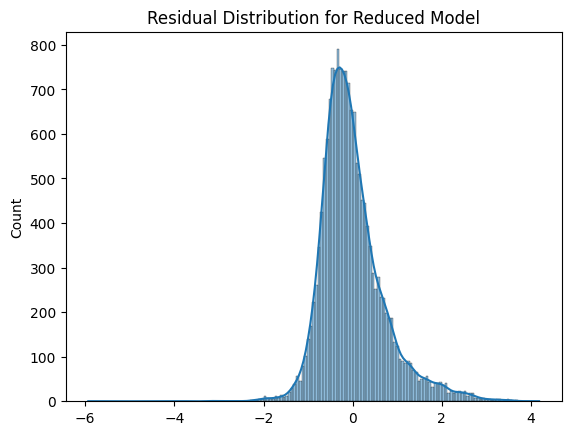

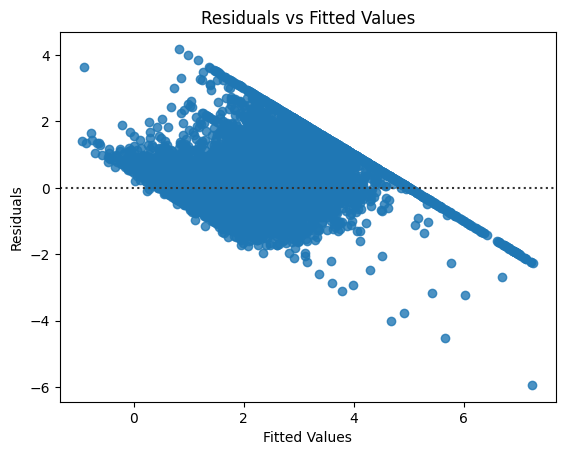

In [13]:
# Plot residuals to check if they are normally distributed
residuals = model_reduced.resid
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution for Reduced Model')
plt.show()

# Residuals vs Fitted Values plot to check homoscedasticity
sns.residplot(x=model_reduced.fittedvalues, y=model_reduced.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()
